# The use of dictionaries

In the code below, we start with the *function* we developed from the [last lecture](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/notebooks/2023-09-20.ipynb) to calculate the ideal heat capacity of a compound.  Recall, that the expression for the heat capacity (given by the Shomate equation) and the corresponding parameters were taken from the NIST Chemistry WebBook.
For more information on the use of functions in Python, see the [notebook](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/notebooks/python_functions.ipynb)
on the Myplace page.

The code below plots the heat capacity of methane as a function of temperature.

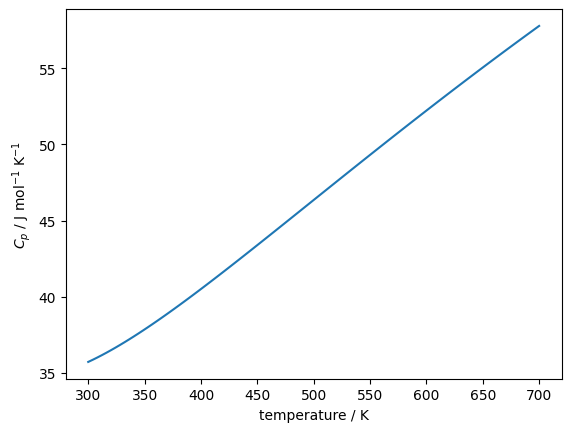

In [ ]:
methane = [-0.703,108.477,-42.522,5.86279,0.67857,-76.844,158.716,-74.873]
oxygen = [31.3223,-20.235,57.8664,-36.506,-0.0074,-8.9035,246.795,0]
nitrogen = [28.98641,1.853978,-9.647459,16.63537,0.000117,-8.671914,226.4168,0]
CO2 = [24.99735,55.18696,-33.69137,7.948387,-0.136638,-403.6075,228.2431,-393.5224]
water = [30.092,6.832514,6.793435,-2.53448,0.082139,-250.881,223.3967,-241.8264]

def get_Cp(T, param):
  t = T/1000
  A, B, C, D, E, F, G, H = param
  Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
  return Cp

Cp = get_Cp(400, methane)


import numpy as np
import pylab as plt

T_list = np.linspace(300, 700, 100)
Cp_list = [get_Cp(T, methane) for T in T_list]

plt.plot(T_list, Cp_list)

plt.xlabel('temperature / K')
plt.ylabel('$C_p$ / J mol$^{-1}$ K$^{-1}$')
plt.show()






## Looping through dictionaries

Before we get to anything complicated, let's just look at looping through dictionaries.  Note that this was already covered in a [notebook on Myplace](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/notebooks/python_dictionaries.ipynb).  Below, we first construct a dictionary `x` which contains as a key the name of a compound, and its values are the corresponding mole fraction of the compound.

We loop through an print the keys, values, and finally both the keys and values of the dictionary `x`.

In [ ]:
x = {}
x['methane'] = 0.2
x['oxygen'] = 0.4
x['nitrogen'] = 0.4




for molecule in x.keys():
  print(molecule)


for asdf in x.values():
  print(asdf)

for molecule, frac in x.items():
  print(molecule, frac)

methane
oxygen
nitrogen
0.2
0.4
0.4
methane 0.2
oxygen 0.4
nitrogen 0.4


## molecular weight of a mixture

We can exploit the ability to loop over a dictionary to calculate the molecular weight of a mixture.  The molecular weight of the mixture is just the sum of the product of the molecular weight and mole fraction of each individual component in the mixture.

First, we create a dictionary `x` that contains the mole fraction of each compound in a mixture.  The key is the name of the compound, and the value is the corresponding mole fraction.
Then, we construct the dictionary `data` which contains the molecular weight of each individual compound.  The key of the dictionary `data` is the name of the compound, and the value is the molecular weight of the compound.

The code to obtain the molecular weight of the mixture is given below:

In [ ]:
data = {'methane': 16, 'oxygen': 32, 'nitrogen': 28, 'water': 18}

x = {}
x['methane'] = 1
x['oxygen'] = 0.
x['nitrogen'] = 0.

MW = 0.0
for mol in x.keys():
  MW += data[mol] * x[mol]
print(MW)

16.0


We can obtain the heat capacity of a mixture in a very similar manner.  In a previous code block, we have already created a function that returns the heat capacity of a compound, if we give it a temperature and a list of parameters.  We can use this to obtain the heat capacity of a mixture, which is just the sum of the product of the heat capacity of a pure compound with its mole fraction in the mixture.

To do this, we first create the dictionary `p` which contains the parameters for the Shomate equation (which is a correlation for the heat capacity) for a particular compound.  The key is the name of the compound, and the value is a list which contains the values of the parameters.  The resulting code to calculate the heat capacity of a mixture is shown below:

In [ ]:
x = {}
x['methane'] = 0.2
x['oxygen'] = 0.4
x['nitrogen'] = 0.4

data = {'methane': 16, 'oxygen': 32, 'nitrogen': 28, 'water': 18}

p = {}
p['methane'] = [-0.703,108.477,-42.522,5.86279,0.67857,-76.844,158.716,-74.873]
p['oxygen'] = [31.3223,-20.235,57.8664,-36.506,-0.0074,-8.9035,246.795,0]
p['nitrogen'] = [28.98641,1.853978,-9.647459,16.63537,0.000117,-8.671914,226.4168,0]
p['CO2'] = [24.99735,55.18696,-33.69137,7.948387,-0.136638,-403.6075,228.2431,-393.5224]
p['water'] = [30.092,6.832514,6.793435,-2.53448,0.082139,-250.881,223.3967,-241.8264]

def get_Cp(T, param):
  t = T/1000
  A, B, C, D, E, F, G, H = param
  Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
  return Cp

Cp = get_Cp(400, p['methane'])
print(Cp)

T = 400
Cpmix = 0.0
for mol in x.keys():
  Cp = get_Cp(T, p[mol])
  Cpmix += Cp * x[mol]
print(Cpmix)

def get_Cpmix(T, x):
  Cpmix = 0.0
  for mol in x.keys():
    Cp = get_Cp(T, p[mol])
    Cpmix += Cp * x[mol]
  return Cpmix


print(get_Cpmix(500, x))



40.50056106
31.841749288000003
33.53441515


Let's plot the heat capacity of the pure species and

40.50056106
34.28436779784


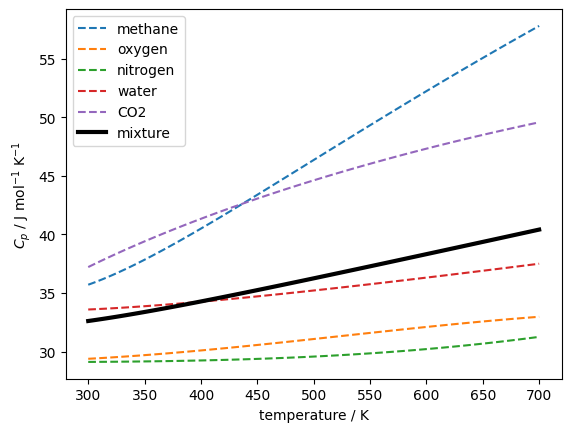

In [5]:
import numpy as np
import pylab as plt



x = {}
x['methane'] = 0.2
x['oxygen'] = 0.21*0.4
x['nitrogen'] = 0.79*0.4
x['water'] = 0.3
x['CO2'] = 0.1

data = {'methane': 16, 'oxygen': 32, 'nitrogen': 28, 'water': 18}

p = {}
p['methane'] = [-0.703,108.477,-42.522,5.86279,0.67857,-76.844,158.716,-74.873]
p['oxygen'] = [31.3223,-20.235,57.8664,-36.506,-0.0074,-8.9035,246.795,0]
p['nitrogen'] = [28.98641,1.853978,-9.647459,16.63537,0.000117,-8.671914,226.4168,0]
p['CO2'] = [24.99735,55.18696,-33.69137,7.948387,-0.136638,-403.6075,228.2431,-393.5224]
p['water'] = [30.092,6.832514,6.793435,-2.53448,0.082139,-250.881,223.3967,-241.8264]

def get_Cp(T, param):
  t = T/1000
  A, B, C, D, E, F, G, H = param
  Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
  return Cp

Cp = get_Cp(400, p['methane'])
print(Cp)

T = 400
Cpmix = 0.0
for mol in x.keys():
  Cp = get_Cp(T, p[mol])
  Cpmix += Cp * x[mol]
print(Cpmix)

def get_Cpmix(T, x):
  Cpmix = 0.0
  for mol in x.keys():
    Cp = get_Cp(T, p[mol])
    Cpmix += Cp * x[mol]
  return Cpmix

T_list = np.linspace(300, 700, 100)
for A in x.keys():
  y_list = [get_Cp(T, p[A]) for T in T_list]
  plt.plot(T_list, y_list, label=A, ls='dashed')

y_list = [get_Cpmix(T, x) for T in T_list]
plt.plot(T_list, y_list, label='mixture', lw=3, color='black')

plt.legend()
plt.xlabel('temperature / K')
plt.ylabel('$C_p$ / J mol$^{-1}$ K$^{-1}$')
plt.show()


In the next lecture, we will see how to build on this by looking at using functions and numerical integration.

In [9]:
N = 1000 # number of rectangles
a = 0 # lower limit
b = 10 # upper limit

def integrate(a, b, N):
  dx = (b-a)/N
  x_list = []
  f_list = []
  for i in range(N):
    x = a + dx*(i+0.5)
    x_list.append(x)
    f_list.append(x**2+2*x+1)
  return dx*sum(f_list)
  print(x_list)
  print(f_list)

I = integrate(a, b, N)
print(I, b**3/3+b**2+b - a**3/3-a**2-a)

443.33325000000025 443.3333333333333
